<a href="https://colab.research.google.com/github/hbaflast/deep-learning-tutorial-fr/blob/main/classification_image_2_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Classification d'images - CIFAR10**

Dans cet exercice vous apprenez à utiliser des réseaux de neurones convolutifs afin de classifier des images de chiffres.

Pour cela on utilise la librairie de deep learning Keras, et la base de données CIFAR10 qui est une base de données très connue dans le monde du deep learning. Cette base de données contient des images de différentes catégories comme des chats ou des voitures, nous sommes donc dans le cas d'une classification multi classes. Ce problème est plus complexe que celui de MNIST, cela est du à la grande variété possible d'images.

## **1 - Importation de module**

**Importer les modules Tensorflow, Numpy, Matplotlib et pylot de Matplotlib**

In [ ]:
import numpy as np
import matplotlib as mpl

import tensorflow as tf

import matplotlib.pyplot as plt

In [ ]:
mpl.rcParams['axes.grid'] = False # On enlève les grilles des figure matplotlib pour le style

 **Afficher le GPU de la machine**
 
 Vérifions que le GPU de l'environnement de travail est bien activé

In [ ]:
! nvidia-smi

Wed Oct 28 14:57:39 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 2 - **Importation et Exploration des données**

**Importer le jeu de données depuis Keras**

Le jeu de données CIFAR10 est directement téléchargable via Keras, car comme dit précédement il fait partie des jeux de données les plus connus en reconnaisance d'images.

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

**Afficher de quel type sont les données et leurs labels**

In [ ]:
print("Les données sont de type :", type(x_train))
print("Les labels sont de type :", type(y_train))

Les données sont de type : <class 'numpy.ndarray'>
Les labels sont de type : <class 'numpy.ndarray'>


**Afficher les dimensions des données et de leurs labels**

Du jeu d'entrainement

In [ ]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

Du jeu de test

In [ ]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

**Quelle est la résolution des images ?**

---



*Les images sont de résolution 32x32 pixels*

**Visualiser une image**

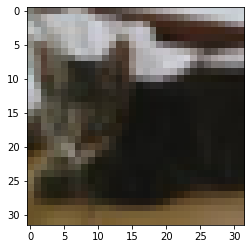

In [ ]:
plt.imshow(x_train[9]);

**Que représente l'image ?**

---



*Une image de chat*

**Visualiser cette image sous son format de matrice**

In [ ]:
x_train[9]

array([[[125, 125, 116],
        [110, 101,  91],
        [102,  90,  83],
        ...,
        [202, 207, 214],
        [200, 205, 212],
        [202, 208, 214]],

       [[142, 146, 142],
        [146, 144, 139],
        [176, 172, 170],
        ...,
        [195, 201, 205],
        [198, 205, 209],
        [204, 211, 215]],

       [[180, 185, 183],
        [143, 146, 146],
        [156, 157, 157],
        ...,
        [122, 111, 113],
        [139, 128, 131],
        [158, 147, 150]],

       ...,

       [[104,  82,  41],
        [101,  80,  39],
        [101,  81,  38],
        ...,
        [126, 103,  67],
        [126, 103,  69],
        [125, 101,  68]],

       [[104,  81,  40],
        [105,  84,  41],
        [109,  88,  43],
        ...,
        [138, 113,  78],
        [137, 113,  80],
        [137, 112,  81]],

       [[105,  83,  42],
        [108,  87,  45],
        [115,  94,  50],
        ...,
        [143, 117,  82],
        [143, 116,  84],
        [144, 116,  86]]

**Afficher la liste des labels**

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**Afficher la distribution des labels**

Du jeu d'entrainement

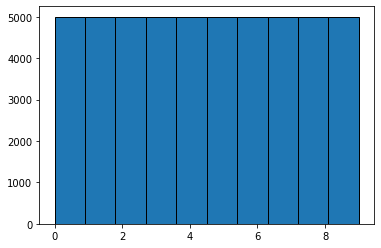

In [ ]:
plt.hist(y_train, edgecolor = 'black');

Du jeu de test

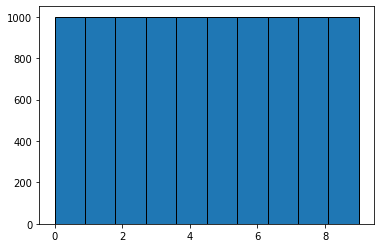

In [ ]:
plt.hist(y_test, edgecolor = 'black');

**Que remarque-t-on ?**

---



*Les données sont parfaitement balancées *

**Classe du jeu de données**

In [ ]:
dict_conversion_classe = {  # dictionnaire de l'équivalence des classes des labels
           0: 'avion',
           1: 'voiture',
           2: 'oiseau',
           3: 'chat',
           4: 'cerf',
           5: 'chien',
           6: 'grenouille',
           7: 'cheval',
           8: 'bateau',
           9: 'camion',
}

**Afficher pour chaque classe du jeu de données une image lui correspondant**

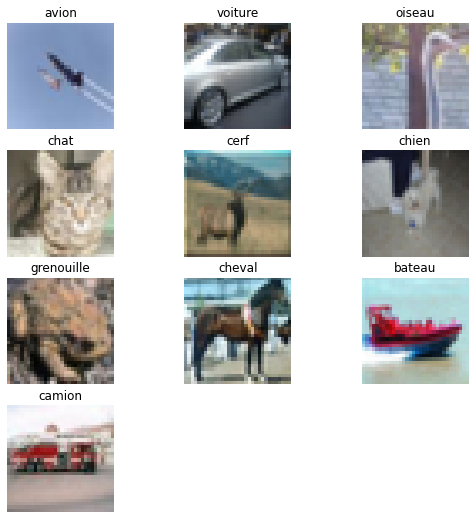

In [ ]:
plt.figure(figsize=(9,9))
for classe in range(10):
  plt.subplot(4, 3, classe+1) 
  ix = np.random.choice(np.where(y_train == classe)[0])
  plt.imshow(x_train[ix])
  plt.axis('off')
  plt.title(dict_conversion_classe[classe])

## **3 - Préparation des données**

**Changer le data type des arrays en float32**

In [ ]:
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')

**Normaliser les données afin que les pixels soient compris entre 0 et 1**

In [ ]:
X_train /= 255.0
X_test /= 255.0

**Effectuer un One-hot encodage des labels**

On a besoin d'encoder nos labels afin d'en obtenir une meilleur représentation et de ne pas avoir de notion d'ordre

On va pour cela utiliser une fonction de la librairie de machine learning scikit-learn

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder()

In [ ]:
Y_train = enc.fit_transform(y_train).toarray()
Y_test = enc.fit_transform(y_test).toarray()

**Afficher maintenant les dimensions des labels**

In [ ]:
Y_train.shape, Y_test.shape

((50000, 10), (10000, 10))

**Que remarque-t-on ?**

---

*Les arrays des labels ont maintenant une taille de 10 pour la deuxième dimension*

**Afficher un label non encodé et son équivalent encodé**

In [ ]:
print("Label non encodé :", y_train[0])
print('Label encodé :', Y_train[0])

Label non encodé : [6]
Label encodé : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## **4 - Definition du modèle**


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

**Faire une fonction permettant de créer un modèle**

Nous sommes ici dans un cas de classification multi classes il faut donc choisir la fonction de coût et la fonction d'activation de la dernière couche qui correspond au problème.

In [ ]:
def create_model():
  
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  
  opt = Adam(lr=0.001)
  
  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
  
  return model

**Afficher un résumé de votre modèle**

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         7

**Entrainer le modèle**

On conserve l'historique de l'entrainement du modèle afin d'evaluer sa progression par la suite.

On utilisera un jeu de validation correspondant à un cinquième du jeu d'entrainement.

In [ ]:
history = model.fit(X_train, Y_train,
                    batch_size=16,
                    epochs=10,
                    validation_split=0.2,
                    shuffle=True)

Epoch 1/10
2500/2500 [==============================] - 9s 4ms/step - loss: 1.4386 - accuracy: 0.4777 - val_loss: 1.1545 - val_accuracy: 0.5813
Epoch 2/10
2500/2500 [==============================] - 9s 4ms/step - loss: 0.9874 - accuracy: 0.6509 - val_loss: 0.8913 - val_accuracy: 0.6822
Epoch 3/10
2500/2500 [==============================] - 9s 3ms/step - loss: 0.8070 - accuracy: 0.7163 - val_loss: 0.8498 - val_accuracy: 0.7086
Epoch 4/10
2500/2500 [==============================] - 9s 3ms/step - loss: 0.6934 - accuracy: 0.7559 - val_loss: 0.8322 - val_accuracy: 0.7134
Epoch 5/10
2500/2500 [==============================] - 9s 4ms/step - loss: 0.6074 - accuracy: 0.7893 - val_loss: 0.7854 - val_accuracy: 0.7416
Epoch 6/10
2500/2500 [==============================] - 9s 4ms/step - loss: 0.5334 - accuracy: 0.8138 - val_loss: 0.8034 - val_accuracy: 0.7353
Epoch 7/10
2500/2500 [==============================] - 9s 3ms/step - loss: 0.4707 - accuracy: 0.8358 - val_loss: 0.8524 - val_accuracy:

**Evaluer le modèle sur le jeu de test**

Afficher la loss et l'accuracy du modèle

In [ ]:
scores = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.0083 - accuracy: 0.7324
Test loss: 1.0083023309707642
Test accuracy: 0.7324000000953674


**Quelle accuracy obtenez-vous ?**

---



*71% d'accuracy*

**Afficher les courbes de loss**

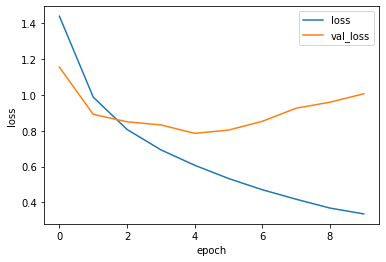

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

## **5 - Visualisation des prédictions**

**Effectuer les prédictions du modèle sur le jeu de test**

In [ ]:
Y_pred = model.predict(X_test, verbose=1)

313/313 [==============================] - 1s 2ms/step


**Afficher les prédictions**

In [ ]:
Y_pred

array([[1.9423089e-05, 1.8075635e-09, 7.4406688e-07, ..., 2.3091020e-07,
        8.8180868e-06, 6.2135482e-06],
       [7.3869552e-07, 6.8474792e-02, 1.8460371e-08, ..., 2.3240535e-13,
        9.3151653e-01, 7.9262818e-06],
       [5.8891722e-03, 5.3691500e-01, 6.0952781e-03, ..., 1.9622823e-02,
        3.9223647e-01, 2.2443077e-02],
       ...,
       [3.8294284e-06, 6.8035749e-10, 8.0633795e-01, ..., 1.0459501e-03,
        1.5003281e-10, 1.5395750e-08],
       [1.8210266e-03, 3.7312967e-01, 9.5879817e-03, ..., 1.0938884e-03,
        2.9364874e-05, 1.2353829e-03],
       [2.7711573e-11, 2.0960297e-10, 9.1590202e-08, ..., 9.9864930e-01,
        8.7611099e-12, 1.4530283e-12]], dtype=float32)

**Afficher les dimensions de l'array des précisions**

In [ ]:
Y_pred.shape

(10000, 10)

**Que remarque-t-on ?**

---

*On obtient les probabilités pour chaque classes*

**Transformer les précisions**

Afin d'obternir la classe que le modèle prédit

In [ ]:
y_pred = np.argmax(Y_pred, axis=1)
y_pred = np.vstack(y_pred)

**Afficher les prédictions transformées**

In [ ]:
y_pred

array([[3],
       [8],
       [1],
       ...,
       [2],
       [4],
       [7]])

**Afficher 10 predictions où le modèle s'est trompé**

Afficher les images, leurs labels et leurs prédictions

In [ ]:
ix_wrong_pred = np.where(y_pred != y_test)[0]

In [ ]:
ix_wrong_pred.shape

(2676,)

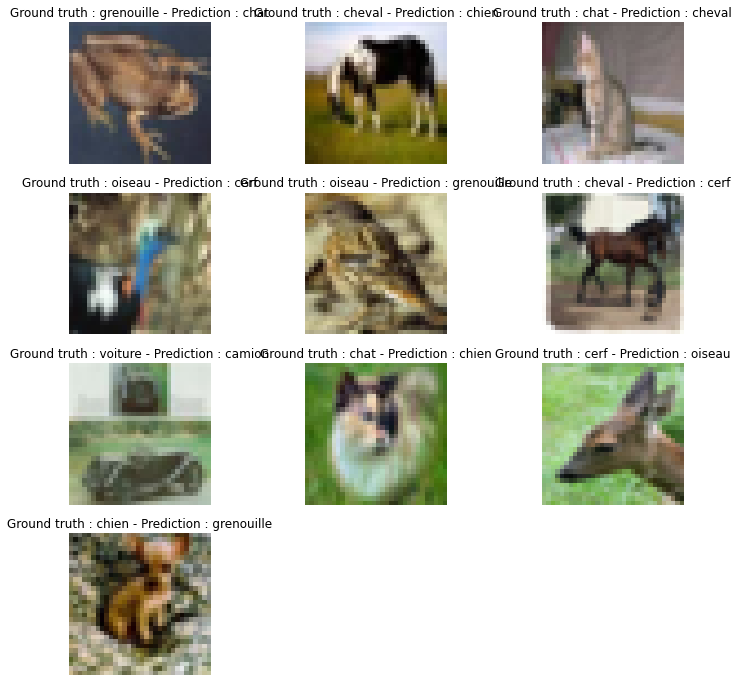

In [ ]:
plt.figure(figsize=(12,12))
for i in range(10):
  plt.subplot(4, 3, i+1) 
  ix = np.random.choice(ix_wrong_pred)
  plt.imshow(x_test[ix])
  plt.axis('off')
  plt.title('Ground truth : ' + str(dict_conversion_classe[y_test[ix][0]]) + ' - '+ 
            'Prediction : ' + str(dict_conversion_classe[y_pred[ix][0]]))

## **6 - Prediction sur une nouvelle image**

On utilise la librairie PIL afin de traiter nos images

In [ ]:
import urllib.request # permet de télécharger des images depuis internet

In [ ]:
urllib.request.urlretrieve("http://ekladata.com/8qVY7jLrhi1P_aqf2mCZKynK4JM.jpg", "img_grenouille") #lien de l'image sur internet

('img_grenouille', <http.client.HTTPMessage at 0x7f0c067706a0>)

**Import le module Image de la librairie PIL**

In [ ]:
from PIL import Image

**Lire l'image importée**

In [ ]:
img = Image.open('img_grenouille')

**Afficher l'image**

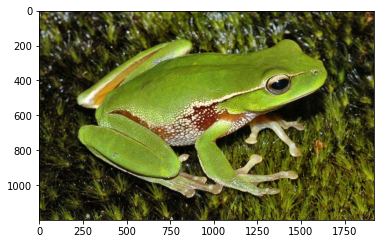

In [ ]:
plt.imshow(img);

**Définir une fonction permettant de faire une prédiction sur une image**

In [ ]:
def prediction(image):
  
  image = np.array(image.resize((32,32)))
  image = image / 255
  image = image.reshape(1,32,32,3)
  
  pred = model.predict(image)[0]
  pred= np.argmax(pred)
  pred = dict_conversion_classe[pred]
 
  return pred

**Effectuer une prédiction de l'image**

In [ ]:
print("Prediction de l'image :", prediction(img))

Prediction de l'image : grenouille


## **7 - Amélioration des résultats**

Deux méthodes permettent d'améliorer le résultat précedent 

## 7.1 - Augmentation de données

Pour faire notre augmentation de données nous utilisons la classe ImageDataGenerator qui permet de créer un générateur python qui fait des transformations aléatoires sur les images.

**Import la classe ImageDataGenerator de la librairie Keras**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Créer un générateur d'augmentation de données à partir de cette classe**

In [ ]:
datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

**Re-créer votre modèle et afficher son résumé**

On recrée un nouveau modèle afin de reinitialiser les poids et de pouvoir comparer les performances

In [ ]:
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 128)        

**Créer un nouveau jeu de données de validation à partir du jeu d'entrainement**


Il faut créer un jeu de validation à part qui n'est pas affecté par l'augmentation de données du générateur

On utilise la fonction train_test_split de scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_2, X_val, Y_train_2, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

**Entrainer le modèle**

On utilise la méthode fit_generator cette fois-ci au lieu de fit.

In [ ]:
history = model.fit_generator(datagen.flow(X_train_2, Y_train_2, batch_size=32),
                              steps_per_epoch=len(X_train_2) / 32, 
                              epochs=20, 
                              validation_data=(X_val, Y_val),
                              shuffle=True)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
1250/1250 [==============================] - 19s 15ms/step - loss: 1.5719 - accuracy: 0.4272 - val_loss: 1.2003 - val_accuracy: 0.5700
Epoch 2/20
1250/1250 [==============================] - 19s 15ms/step - loss: 1.1188 - accuracy: 0.6087 - val_loss: 0.9517 - val_accuracy: 0.6707
Epoch 3/20
1250/1250 [==============================] - 19s 16ms/step - loss: 0.9371 - accuracy: 0.6727 - val_loss: 0.8372 - val_accuracy: 0.7184
Epoch 4/20
1250/1250 [==============================] - 19s 15ms/step - loss: 0.8347 - accuracy: 0.7121 - val_loss: 0.8038 - val_accuracy: 0.7318
Epoch 5/20
1250/1250 [==============================] - 19s 15ms/step - loss: 0.7680 - accuracy: 0.7343 - val_loss: 0.8700 - val_accuracy: 0.7050
Epoch 6/20
1250/1250 [==============================] - 19s 15ms/step - loss: 0.7256 - accuracy: 0.7494 - val_loss: 0.7333 - val_accuracy: 0.7552
Epoch 7/20
1250/1250 [==========================

**Evaluer le modèle sur le jeu de test**

Afficher la loss et l'accuracy du modèle

In [ ]:
scores = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 206us/step
Test loss: 0.7310621667385101
Test accuracy: 0.7664


**Quelle accuracy obtenez-vous ?**

---



*77% d'accuracy*

**Afficher les courbes de loss**

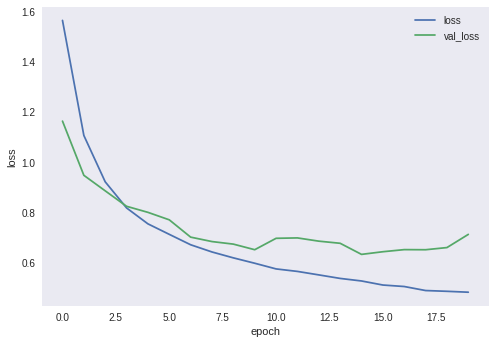

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

**Que peut-on en conclure ?**

---



*On obtient un meilleur résulat.*

*Le modèle met plus de temps à s'entrainer et on sur apprend moins.*

## 7.2 - Transfer Learning

Pour effecteur notre transfer learning on part d'un modèle VGG16 pré-entrainé sur le jeu de données ImageNet.

L'architecture et les poids du modèle se trouvent aussi dans Keras.

**Importer la fonction VGG16 de la librairie Keras**

Importer aussi la classe Model qui permet de créer un nouveau modèle à partir d'un modèle existant.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16

**Faire une fonction qui permet de créer notre modèle à partir du modèle pré-entrainé**

In [ ]:
def create_model_transfer():
  
  base_model = VGG16(weights='imagenet', include_top=False, pooling='max', input_shape=(64,64,3))
  x = base_model.output
  predictions = Dense(10, activation='softmax')(x)
  
  model = Model(inputs=base_model.input, outputs=predictions)
  
  opt = Adam(lr=0.0001)
  
  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
  
  return model

**Afficher un résumé de votre modèle**

In [ ]:
model_transfer = create_model_transfer()
model_transfer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

**Quel est le problème si on indique la taille des images en entrée du réseau ?**

---



*Le réseau pré-entrainé effectuant un certain nombre d'opérations de pooling il y a une taille minimale d'image que l'on peut mettre en entrée.*

**Faire une fonction permettant de doubler la taille de nos images dans notre jeu de données**

In [ ]:
from tqdm import tqdm # Utile pour suivre la progression de notre fonction

In [ ]:
def upscaling_dataset(dataset):
  dataset_upscale = []
  for img in tqdm(dataset):
    img = Image.fromarray(img)
    img = img.resize((64,64))
    img = np.array(img)
    dataset_upscale.append(img)
  dataset_upscale = np.array(dataset_upscale)
  return dataset_upscale

In [ ]:
X_train_3 = upscaling_dataset(x_train)
X_test_3 = upscaling_dataset(x_test)

100%|██████████| 10000/10000 [00:01<00:00, 9487.72it/s]


**Re-changer le data type des données en float32**

In [ ]:
X_train_3 = X_train_3.astype('float32')
X_test_3 = X_test_3.astype('float32')

**Re-normaliser les données afin que les pixels soient compris entre 0 et 1**

In [ ]:
X_train_3 /= 255.0
X_test_3 /= 255.0

**Entrainer le nouveau modèle**

In [ ]:
history = model_transfer.fit(X_train_3, Y_train,
                             batch_size=16,
                             epochs=5,
                             validation_split=0.2,
                             shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 259s 6ms/step - loss: 0.7752 - acc: 0.7298 - val_loss: 0.4276 - val_acc: 0.8534
Epoch 2/5
40000/40000 [==============================] - 255s 6ms/step - loss: 0.3642 - acc: 0.8767 - val_loss: 0.3637 - val_acc: 0.8790
Epoch 3/5
40000/40000 [==============================] - 254s 6ms/step - loss: 0.2402 - acc: 0.9181 - val_loss: 0.3472 - val_acc: 0.8857
Epoch 4/5
40000/40000 [==============================] - 256s 6ms/step - loss: 0.1667 - acc: 0.9427 - val_loss: 0.3032 - val_acc: 0.9048
Epoch 5/5
40000/40000 [==============================] - 261s 7ms/step - loss: 0.1175 - acc: 0.9596 - val_loss: 0.3840 - val_acc: 0.8787


**Evaluer le modèle sur le jeu de test**

Afficher la loss et l'accuracy du modèle

In [ ]:
scores = model_transfer.evaluate(X_test_3, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 11s 1ms/step
Test loss: 0.3998684534430504
Test accuracy: 0.878


**Quelle accuracy obtenez-vous ?**

---



*88% d'accuracy*

**Que peut-on en conclure ? **

---



*On obtient un meilleur résultat.*

*Le modèle met du temps à s'entrainer car l'architecture est beaucoup plus grande mais il suffit de voir l'ensemble des données peu de fois afin d'obtenir un bon score*. 

# Fin